# Objetivos
### 1.- Personaliza tú mapa. <br>
Con las tres capas proporcionadas trata de cumplir las siguientes tareas
- Realiza un mapa de los vecindarios de liverpool que incluya las siguientes caracteristicas:
    - Un titulo
    - No incluya los ejes de los bordes
    - Un tamaño de figura de 10
    - El color de los poligonos corresponda a "#525252" y una transparencia del 50%
    - El límite de los pologonos tenga un ancho de 0.3 y el color "#B9EBE3"
    - Incluya un mapa base con el tema Stamen watercolor
    
### 2.- Manipulación no espacial. <br>
Para cumplir este objetivo usaremos lo aprendido en lecciones anteriores
Enfocate en la capa de LSOA liv y realiza lo siguiente:
- Calcula el área de cada vencindario
- Encuentra las 5 áreas más pequelas de la tabla y crea una variable solamente con ellas
- Crea un mapa multicapa de Liverpool donde las cinco áreas más pequeñas se encuentren coloreadas de rojo, y las demás aparezcan en negro

### 3.- La brecha de genero de las calles
Esta tarea es más avanazada, por lo tanto no desesperes si no puedes lograrla al principio. Con el dataset de calles, trata de responder lo siguiente:
- ¿Qué grupo representa la mayor longitud total de calles en Zaragoza: hombres o mujeres? con qupe cantidad?

Answering those two questions involves the following steps:

You will need your spatial data projected, so they are expressed in metres, and the length calculation makes sense. Check out the section on transforming the CRS, and use, for example EPSG:25830 as the target CRS.

Separate streets named after men from those named after women, perhaps in two objects (men, women) that contain the streets for each group. This is a non-spatial query at its heart, so make sure to revisit that section on the previous block.

Calculate the length of each street in each group. Refresh your memory of this in this section.

Create a total length by group by adding the lengths of each street. This is again a non-spatial operation (sum), so make sure to re-read this part of Block B.

Compare the two and answer the questions.

Surprised by the solution? Perhaps not, but remember data analysis is not only about discovering the unexpected, but about providing evidence of the things we “know” so we can build better arguments about actions.


In [1]:
%matplotlib inline

import geopandas
import osmnx
import contextily as cx
from keplergl import KeplerGl
import matplotlib.pyplot as plt

In [2]:
# Cargamos las variables a ocupar

# Cargamos los vecindarios de liverpool
liv = geopandas.read_file("data/Census_Residential_Data_Pack_2011/Local_Authority_Districts/E08000012/shapefiles/E08000012.shp")

# Cargamos las ciclovias de liverpool
bikepaths = osmnx.graph_from_place("Liverpool, UK", network_type="bike")

# Cargamos de OSM los pubs de Liverpool
pubs = osmnx.pois.pois_from_place("Liverpool, UK",
                                  tags={"amenity": "pub"}
                                 )

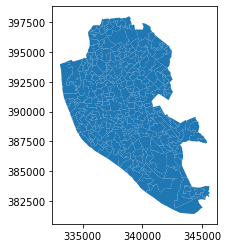

In [4]:
# Visualizamos vecindarios de Liverpool
liv.plot()

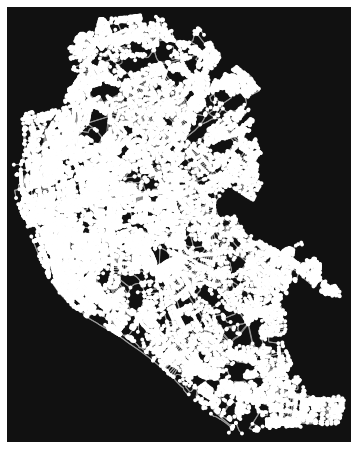

In [10]:
# Visualizamos ciclovias
fig, ax = osmnx.plot_graph(bikepaths)

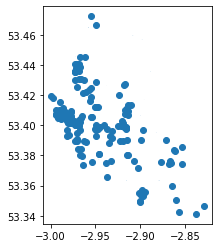

In [6]:
# Visualizamos pubs
pubs.plot()

In [13]:
# Comprobamos el sistema de coordenadas de los datos
print ('Liverpool')
print (liv.crs)
print ('Pubs')
print (pubs.crs)

Liverpool
PROJCS["Transverse_Mercator",GEOGCS["GCS_OSGB 1936",DATUM["OSGB_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4277"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.9996012717],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Pubs
epsg:4326


### 1.- Personaliza tú mapa. <br>

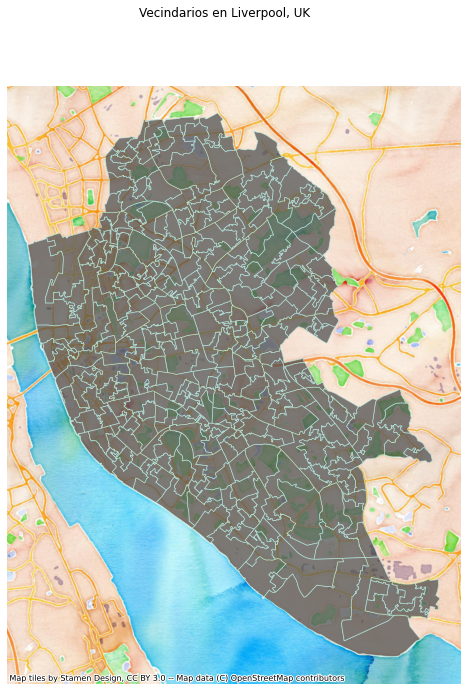

In [25]:
# Setup de la gráfica
f, ax = plt.subplots(1, figsize=(10, 11))
# Agregamos un titulo
f.suptitle("Vecindarios en Liverpool, UK")
# Mostramos y editamos la representación de los elementos a mapear
liv.plot(linewidth=0.75, # Ancho de línea
            edgecolor='#B9EBE3', # Color de línea
            color="#525252", # Color de poligono
            alpha = 0.75, #transparencia
            ax=ax,) # donde se ubica la información
# Agregamos mapa base
cx.add_basemap(ax, crs=liv.crs, source=cx.providers.Stamen.Watercolor);
#  Removemos los bordes
ax.set_axis_off()
# Visualizamos
plt.show()

### 2.- Manipulación no espacial. <br>
Para cumplir este objetivo usaremos lo aprendido en lecciones anteriores
Enfocate en la capa de LSOA liv y realiza lo siguiente:
- Calcula el área de cada vencindario
- Encuentra las 5 áreas más pequeñas de la tabla y crea una variable solamente con ellas
- Crea un mapa multicapa de Liverpool donde las cinco áreas más pequeñas se encuentren coloreadas de rojo, y las demás aparezcan en negro

In [3]:
# Empezamos por indetificar el sistema de coordenadas del df para comprobar las unidades de este mismo
liv.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_OSGB 1936 ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [4]:
# al no tener un sistema de área definido procederemos a reproyectar la capa a su zona utm correspondiente
liv = liv.to_crs(epsg=32630)

In [5]:
# Comprobamos el cambio
liv.crs

<Projected CRS: EPSG:32630>
Name: WGS 84 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 6°W to 0°W - by country
- bounds: (-6.0, 0.0, 0.0, 84.0)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
# Visualizamos la información tabular
liv.head()

,lsoa11cd,geometry
0,E01006512,"POLYGON ((502496.090 5916726.501, 502496.140 5..."
1,E01006513,"POLYGON ((501565.798 5916776.437, 501561.784 5..."
2,E01006514,"POLYGON ((501887.554 5916786.671, 501887.294 5..."
3,E01006515,"POLYGON ((501354.339 5916110.930, 501352.254 5..."
4,E01006518,"POLYGON ((501761.264 5915689.567, 501761.249 5..."


In [8]:
# Calculamos la superficie en metros cuadrados
liv["area_m2"] = liv.area
# Calculamos la superficie en hectáreas
liv["area_ha"] = liv.area/10000
# Visualizamos
liv.head()

,lsoa11cd,geometry,area_m2,area_ha
0,E01006512,"POLYGON ((502496.090 5916726.501, 502496.140 5...",284103.957626,28.410396
1,E01006513,"POLYGON ((501565.798 5916776.437, 501561.784 5...",559197.212533,55.919721
2,E01006514,"POLYGON ((501887.554 5916786.671, 501887.294 5...",262116.889090,26.211689
3,E01006515,"POLYGON ((501354.339 5916110.930, 501352.254 5...",365018.545079,36.501855
4,E01006518,"POLYGON ((501761.264 5915689.567, 501761.249 5...",233946.076439,23.394608


In [11]:
# Acomodamos los valores de forma ascedente, ya se por m2 o hectáreas
liv.sort_values(by='area_ha', ascending=True)
# Visualizamos
liv.head(5)

,lsoa11cd,geometry,area_m2,area_ha
0,E01006512,"POLYGON ((502496.090 5916726.501, 502496.140 5...",284103.957626,28.410396
1,E01006513,"POLYGON ((501565.798 5916776.437, 501561.784 5...",559197.212533,55.919721
2,E01006514,"POLYGON ((501887.554 5916786.671, 501887.294 5...",262116.889090,26.211689
3,E01006515,"POLYGON ((501354.339 5916110.930, 501352.254 5...",365018.545079,36.501855
4,E01006518,"POLYGON ((501761.264 5915689.567, 501761.249 5...",233946.076439,23.394608


In [12]:
# Creamos nueva variabl donde se tendrán 
low_area = liv.head(5)
low_area.head(10)

,lsoa11cd,geometry,area_m2,area_ha
0,E01006512,"POLYGON ((502496.090 5916726.501, 502496.140 5...",284103.957626,28.410396
1,E01006513,"POLYGON ((501565.798 5916776.437, 501561.784 5...",559197.212533,55.919721
2,E01006514,"POLYGON ((501887.554 5916786.671, 501887.294 5...",262116.889090,26.211689
3,E01006515,"POLYGON ((501354.339 5916110.930, 501352.254 5...",365018.545079,36.501855
4,E01006518,"POLYGON ((501761.264 5915689.567, 501761.249 5...",233946.076439,23.394608


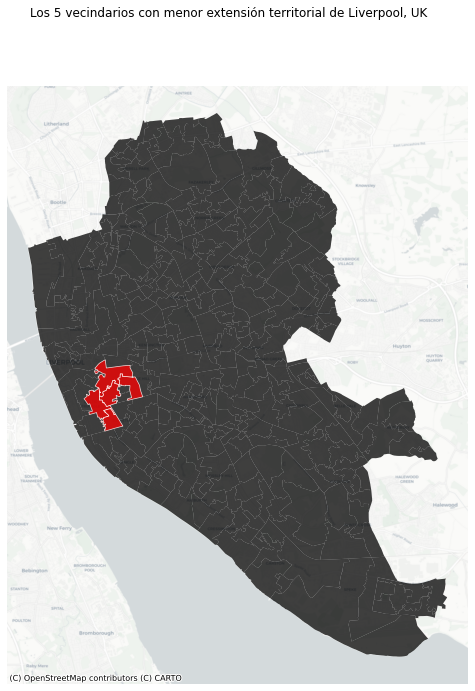

In [24]:
# Setup de la gráfica
f, ax = plt.subplots(1, figsize=(10, 11))
# Agregamos un titulo
f.suptitle("Los 5 vecindarios con menor extensión territorial de Liverpool, UK")
# Mostramos y editamos la representación de los elementos a mapear
liv.plot(color="black", # Color de poligono
            alpha = 0.75, #transparencia
            ax=ax,) # donde se ubica la información
low_area.plot(linewidth=0.75, # Ancho de línea
            edgecolor='white',
            color="red", # Color de poligono
            alpha = 0.75, #transparencia
            ax=ax,) # donde se ubica la información

# Agregamos mapa base
cx.add_basemap(ax, crs=liv.crs, source= cx.providers.CartoDB.Positron)
#  Removemos los bordes
ax.set_axis_off()
# Visualizamos
plt.show()

### 3.- La brecha de genero de las calles
Esta tarea es más avanazada, por lo tanto no desesperes si no puedes lograrla al principio. Con el dataset de calles, trata de responder lo siguiente:
- ¿Qué grupo representa la mayor longitud total de calles en Zaragoza: hombres o mujeres? con qupe cantidad?

Answering those two questions involves the following steps:

You will need your spatial data projected, so they are expressed in metres, and the length calculation makes sense. Check out the section on transforming the CRS, and use, for example EPSG:25830 as the target CRS.

Separate streets named after men from those named after women, perhaps in two objects (men, women) that contain the streets for each group. This is a non-spatial query at its heart, so make sure to revisit that section on the previous block.

Calculate the length of each street in each group. Refresh your memory of this in this section.

Create a total length by group by adding the lengths of each street. This is again a non-spatial operation (sum), so make sure to re-read this part of Block B.

Compare the two and answer the questions.

Surprised by the solution? Perhaps not, but remember data analysis is not only about discovering the unexpected, but about providing evidence of the things we “know” so we can build better arguments about actions.

In [25]:
# Guardamos una variable la ruta de la información de interes
url = ("https://github.com/geochicasosm/lascallesdelasmujeres"\
       "/raw/master/data/zaragoza/final_tile.geojson")

# Cargamos la información
streets = geopandas.read_file(url)

# Visualizamos la información tabular
streets.head()

,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry
0,Calle Camilo José Cela,78317710,,Male,,None,None,"LINESTRING (-1.03303 41.72464, -1.03346 41.72474)"
1,Calle Mariano Domingo Ruiz,66375846,,Male,,None,None,"LINESTRING (-1.03161 41.72427, -1.03228 41.72347)"
2,Calle Camilo José Cela,78317716,,Male,,None,None,"LINESTRING (-1.02922 41.72311, -1.02966 41.723..."
3,Calle Mariano Lozano Sesma,66375810,,Male,,None,None,"LINESTRING (-1.03148 41.72318, -1.03086 41.72393)"
4,Calle Salvador Dalí,66375807,,Male,,None,None,"LINESTRING (-1.03012 41.72357, -1.03072 41.72285)"


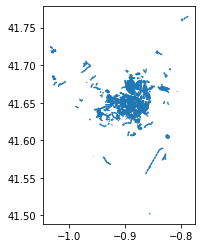

In [27]:
# Visualizamos la información espacial
streets.plot()

In [28]:
# Comprobamos el sistema de coordenadas
streets.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
# La información se encuentra en un sistema de coordenadas geográfica, por lo que necesitamos reproyectarlo para obtener mediciones en el sistema metrico
streets = streets.to_crs(epsg=25830)

In [30]:
# Calculamos la columna 
streets['lenght_m'] = streets.length
streets.head()

,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry,lenght_m
0,Calle Camilo José Cela,78317710,,Male,,None,None,"LINESTRING (663603.811 4621073.573, 663567.846...",37.338828
1,Calle Mariano Domingo Ruiz,66375846,,Male,,None,None,"LINESTRING (663722.643 4621035.106, 663669.127...",104.510732
2,Calle Camilo José Cela,78317716,,Male,,None,None,"LINESTRING (663924.898 4620911.062, 663887.341...",365.969719
3,Calle Mariano Lozano Sesma,66375810,,Male,,None,None,"LINESTRING (663736.599 4620914.752, 663786.170...",97.101436
4,Calle Salvador Dalí,66375807,,Male,,None,None,"LINESTRING (663848.669 4620960.307, 663800.549...",94.002218


In [31]:
men = streets.query('gender == "Male"')
men.head()

,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry,lenght_m
0,Calle Camilo José Cela,78317710,,Male,,None,None,"LINESTRING (663603.811 4621073.573, 663567.846...",37.338828
1,Calle Mariano Domingo Ruiz,66375846,,Male,,None,None,"LINESTRING (663722.643 4621035.106, 663669.127...",104.510732
2,Calle Camilo José Cela,78317716,,Male,,None,None,"LINESTRING (663924.898 4620911.062, 663887.341...",365.969719
3,Calle Mariano Lozano Sesma,66375810,,Male,,None,None,"LINESTRING (663736.599 4620914.752, 663786.170...",97.101436
4,Calle Salvador Dalí,66375807,,Male,,None,None,"LINESTRING (663848.669 4620960.307, 663800.549...",94.002218


In [32]:
female = streets.query('gender == "Female"')
female.head()

,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry,lenght_m
11,Calle Nuestra Señora del Carmen,49025136,https://es.wikipedia.org/wiki/Virgen_del_Carmen,Female,,-,-,"LINESTRING (663963.650 4620386.530, 663849.834...",117.721112
13,Plaza Arnal Gorría,226700443,,Female,,-,-,"LINESTRING (663946.258 4620430.078, 663935.318...",65.738343
14,Calle Nuestra Señora del Carmen,38298205,https://es.wikipedia.org/wiki/Virgen_del_Carmen,Female,,-,-,"LINESTRING (664055.083 4620280.846, 664049.674...",262.099900
15,Calle Nuestra Señora del Carmen,38298187,https://es.wikipedia.org/wiki/Virgen_del_Carmen,Female,,-,-,"LINESTRING (663995.375 4620354.423, 663963.650...",45.136045
25,Calle Virgen de la Rosa,38298197,https://es.wikipedia.org/wiki/Virgen_de_la_rosa,Female,,-,-,"LINESTRING (663991.840 4620213.014, 664055.083...",92.741322


In [39]:
print ("Longitud de calles con nombre masculino")
print (men['lenght_m'].sum())
print ("Longitud de calles con nombre femenino")
print (female['lenght_m'].sum())

Longitud de calles con nombre masculino
398185.65507457696
Longitud de calles con nombre femenino
89069.234963942


Como podemos apreciar las calles con un nombre masculino tienen una mucho mayor extensión lineal que las calles con nombre femenino, con una relación de 4 a 1